# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [541]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline 
sns.set_style('darkgrid') # set style for visualization (darkgrid, whitegrid, dark, white, ticks)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations

import warnings # ignore warnings
warnings.filterwarnings('ignore')

#create html version
!jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 1649315 bytes to PYF_Project_LearnerNotebook_FullCode.html


### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [5]:
df.duplicated().sum()

0

### Observations:
The dataset has been loaded properly<br>
Dataset consists of several columns displaying the various attributes related to each order<br>
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.<br>
There are no duplicated values.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
df.shape

(1898, 9)

### **Answer 1:**

The DataFrame has 1898 rows and 9 colum.pe

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

### **Answer 2:**

&emsp;Data types:<br>
&emsp;&emsp;**Numeric: 5** (order_id, customer_id, food_preparation_time and delivery_time are **"int64"**. cost_of_the_order is **"float64"**)<br>
&emsp;&emsp;**Text: 1** (rating is **"object"** but should be numerical as is expected "a rating given by the customer out of 5" <br>
&emsp;&emsp;**Categorical: 3** (restaurant_name, cuisine_type and day_of_the_week are **"object"**)<br>

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark


In [9]:
df.isna().sum() # missing values per column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Answer 3:**

There are no missing values on the dataframe.<br> 
The output of pevious function info() already answered this, having 1898 entries and for each column having the same quantity of Non-Null values.<br>

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
print(df.describe(include='all').T,'\n') # Statistical summary of the df, including all columns and transposed
print('"food_preparation_time" statistical summary:') # title for the Column of interest
df.food_preparation_time.describe(include='all') # Statistical data for column of interest only

                        count unique          top  freq       mean       std  \
order_id              1898.00    NaN          NaN   NaN 1477495.50    548.05   
customer_id           1898.00    NaN          NaN   NaN  171168.48 113698.14   
restaurant_name          1898    178  Shake Shack   219        NaN       NaN   
cuisine_type             1898     14     American   584        NaN       NaN   
cost_of_the_order     1898.00    NaN          NaN   NaN      16.50      7.48   
day_of_the_week          1898      2      Weekend  1351        NaN       NaN   
rating                   1898      4    Not given   736        NaN       NaN   
food_preparation_time 1898.00    NaN          NaN   NaN      27.37      4.63   
delivery_time         1898.00    NaN          NaN   NaN      24.16      4.97   

                             min        25%        50%        75%        max  
order_id              1476547.00 1477021.25 1477495.50 1477969.75 1478444.00  
customer_id              1311.00   77787.

count   1898.00
mean      27.37
std        4.63
min       20.00
25%       23.00
50%       27.00
75%       31.00
max       35.00
Name: food_preparation_time, dtype: float64

In [544]:
#MLS
df.describe(include='all').T # Statistical summary of the df, including all columns and transposed

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00
Total_time,1898.00,NaN,NaN,NaN,51.53,6.83,35.00,47.00,52.00,56.00,68.00


### **Answer 4:**

The time it takes for food to be prepared once an order is placed is between 20min and 35min, with an average of 27min

### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [12]:
sum(df['rating']=="Not given")

736

In [13]:
sum(df['rating']=="Not given")/df.shape[0]

0.38777660695468913

In [543]:
#MLS:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### **Answer 5:**

There are **736 orders** not rated by customers<br>
This is **38.77%** of orders have no rating from customer

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### **order_id**
order_id: Unique ID of the order<br>
counts equal to one, each order id used only one time as expected.

In [14]:
df.order_id.describe(include='all') # Statistical data for column of interest only

count      1898.00
mean    1477495.50
std         548.05
min     1476547.00
25%     1477021.25
50%     1477495.50
75%     1477969.75
max     1478444.00
Name: order_id, dtype: float64

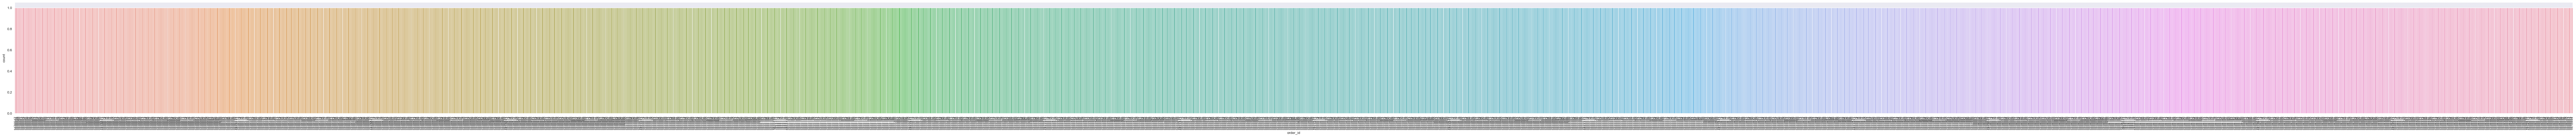

In [21]:
#sns.displot(data=df, x=df.columns[0],kind="hist");
#plt.xticks(rotation=90);
sns.catplot(data=df, x=df.columns[0],kind="count", height=5, aspect=20);
plt.xticks(rotation=90);
#sns.catplot(data=df, x=df.columns[0], kind="box");
#plt.xticks(rotation=90);

#### **customer_id**
customer_id: ID of the customer who ordered the food<br>
From 1200 unique customers, 784 are "single order" customers<br>
The customer 52832, with 13 orders is the customer with more orders<br>

In [22]:
len(df['customer_id'].unique())

1200

In [23]:
sum(df['customer_id'].value_counts()==1)

784

In [24]:
sum(df['customer_id'].value_counts()==1)/df.shape[0]#

0.4130663856691254

In [25]:
df['customer_id'].value_counts()

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

In [26]:
df.customer_id.describe(include='all') # Statistical data for column of interest only

count     1898.00
mean    171168.48
std     113698.14
min       1311.00
25%      77787.75
50%     128600.00
75%     270525.00
max     405334.00
Name: customer_id, dtype: float64

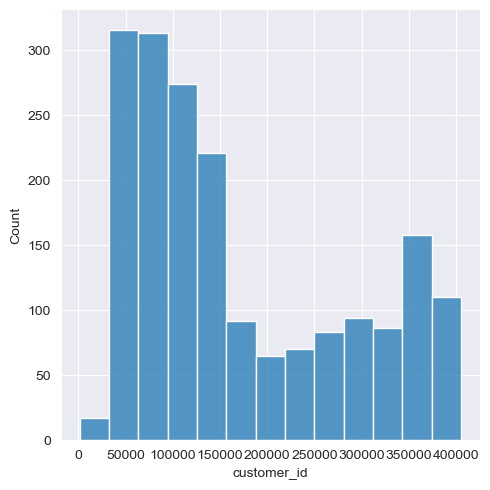

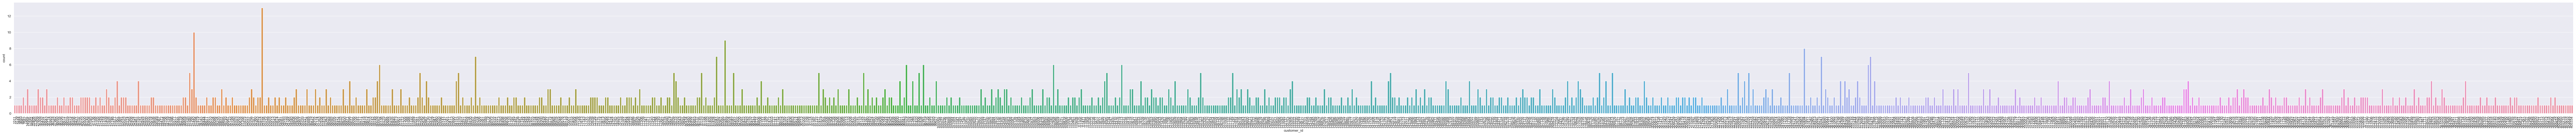

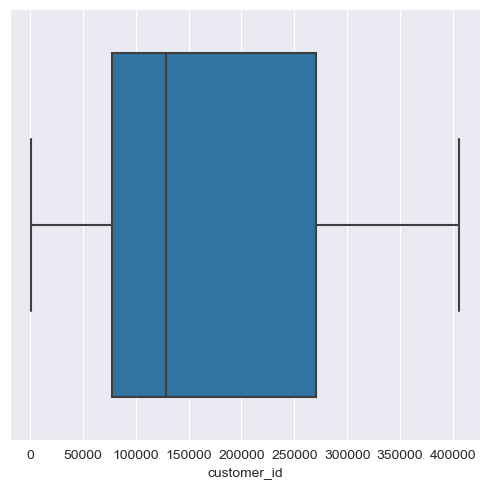

In [27]:
sns.displot(data=df, x=df.columns[1],kind="hist");
sns.catplot(data=df, x=df.columns[1],kind="count", height=5, aspect=20);
plt.xticks(rotation=90);
sns.catplot(data=df, x=df.columns[1], kind="box");


#### **restaurant_name:**
restaurant_name: Name of the restaurant<br>
There are 178 restaurants in the data, 137 of those have less than 10 orders<br>
The most polular reataurants per number of orders are:<br>
* Shake Shack (219)<br>
* The Meatball Shop (132)<br>
* Blue Ribbon Sushi (119)<br>
* Blue Ribbon Fried Chicken (96)<br>
* Parm (68)<br>

In [28]:
df.restaurant_name.describe(include='all') # Statistical data for column of interest only

count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object

In [29]:
sum(df['restaurant_name'].value_counts()<10)

137

In [30]:
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

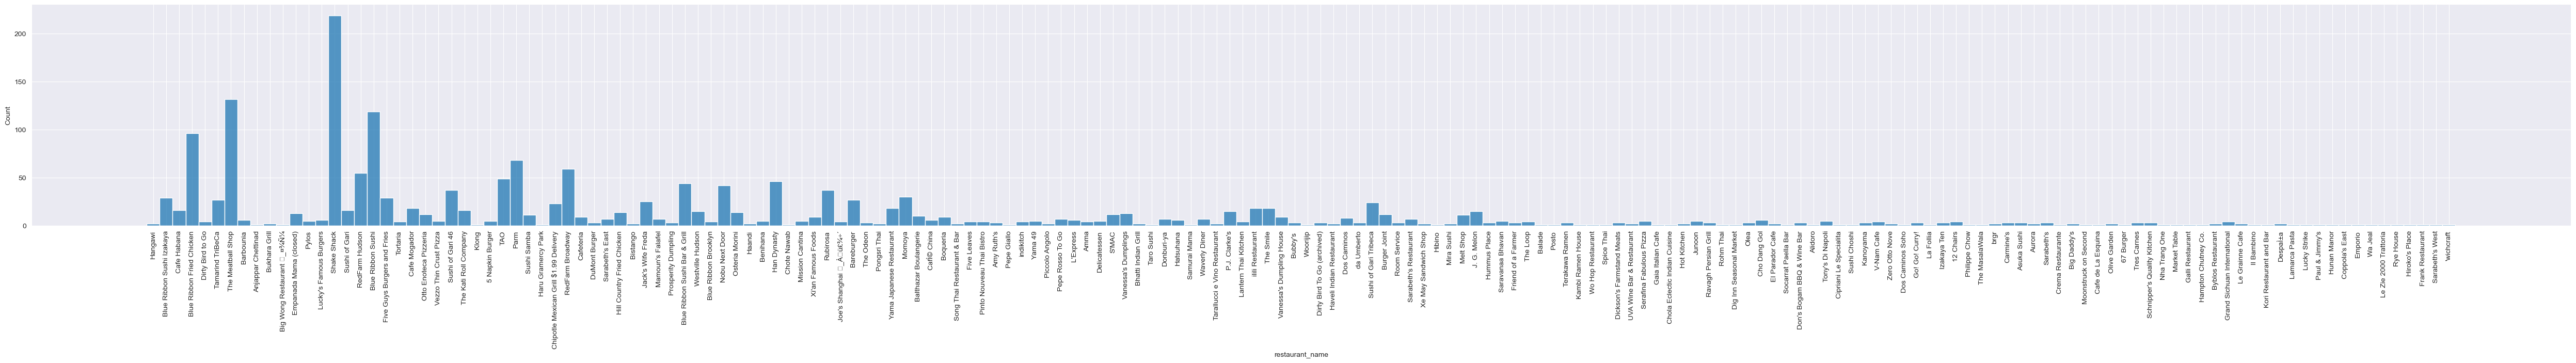

In [31]:
sns.displot(data=df, x=df.columns[2],kind="hist",height=5, aspect=10);
plt.xticks(rotation=90);

#sns.catplot(data=df, x=df.columns[2],kind="count");
#plt.xticks(rotation=90);
#sns.catplot(data=df, x=df.columns[2], kind="box");

#### **cuisine_type**
cuisine_type: Cuisine ordered by the customer<br>
Among the 14 cuisine types, over 80% of orders are for one of following four cuisine types:<br>
* American (584)<br>
* Japanese (470)<br>
* Italian (298)<br>
* Chinese (215)<br>
<br>
Mexican and Indian lead the rest of preferred cuisine types

In [32]:
df.cuisine_type.describe(include='all') # Statistical data for column of interest only

count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object

In [33]:
df.cuisine_type.value_counts().head(10)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: count, dtype: int64

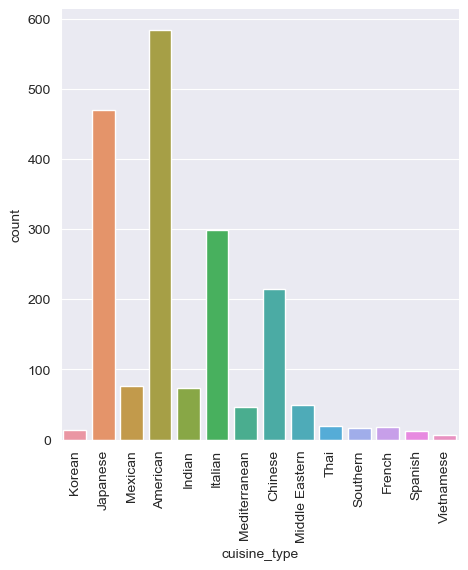

In [548]:
#sns.displot(data=df, x=df.columns[3],kind="hist",);
sns.catplot(data=df, x=df.columns[3],kind="count");
plt.xticks(rotation=90);
#sns.catplot(data=df, x=df.columns[3], kind="box");

#### **cost_of_the_order**
cost: Cost of the order<br>
The average cost of order is 16.5<br>

In [35]:
df.cost_of_the_order.describe(include='all') # Statistical data for column of interest only

count   1898.00
mean      16.50
std        7.48
min        4.47
25%       12.08
50%       14.14
75%       22.30
max       35.41
Name: cost_of_the_order, dtype: float64

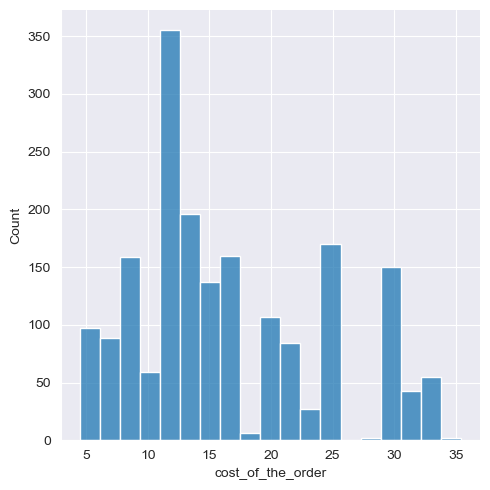

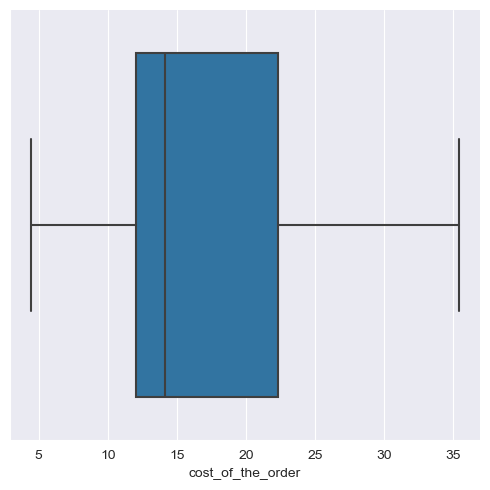

In [551]:
sns.displot(data=df, x=df.columns[4],kind="hist");
#sns.catplot(data=df, x=df.columns[4],kind="count");
sns.catplot(data=df, x=df.columns[4], kind="box");

#### **day_of_the_week**
day_of_the_week: Indicates whether the order is placed on a weekday (MON to FRI) or weekend (SAT-SUN)<br>
71% of orders are done during weekend<br>

In [37]:
df.day_of_the_week.describe(include='all') # Statistical data for column of interest only

count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object

In [38]:
df.day_of_the_week.value_counts(normalize='TRUE')

day_of_the_week
Weekend   0.71
Weekday   0.29
Name: proportion, dtype: float64

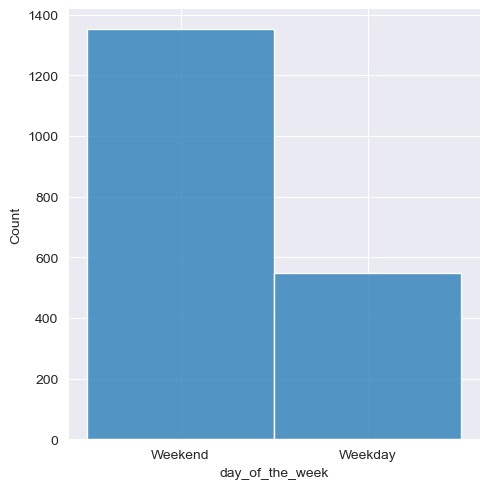

In [39]:
sns.displot(data=df, x=df.columns[5],kind="hist");
#sns.catplot(data=df, x=df.columns[5],kind="bar");
#sns.catplot(data=df, x=df.columns[5], kind="box");

#### **rating**
rating: Rating given by the customer out of 5<br>
Most of orders (39%) have no rating given<br>
Those orders with rating are rated between 3 and 5. No orders rated 1 nor 2

In [40]:
df.rating.describe(include='all') # Statistical data for column of interest only

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object

In [41]:
df.rating.value_counts(normalize='TRUE')

rating
Not given   0.39
5           0.31
4           0.20
3           0.10
Name: proportion, dtype: float64

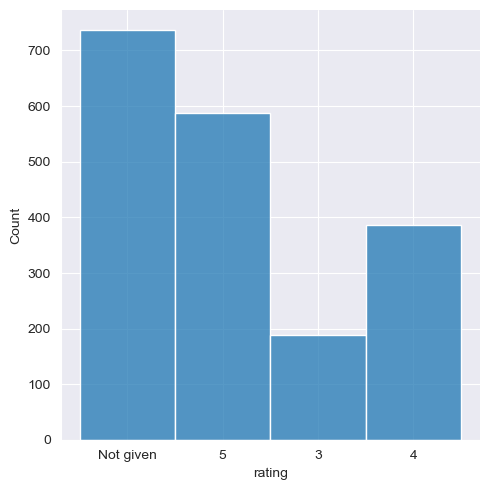

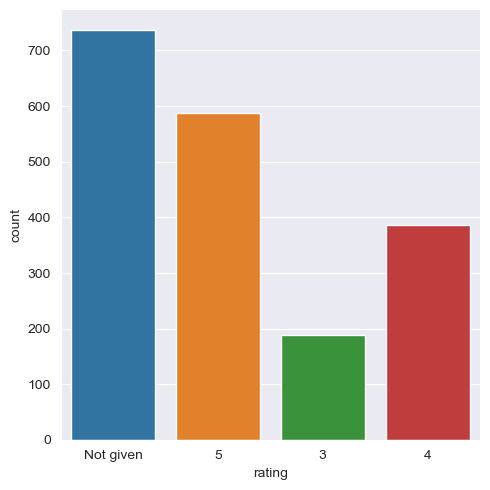

In [553]:
sns.displot(data=df, x=df.columns[6],kind="hist");
sns.catplot(data=df, x=df.columns[6],kind="count");
#sns.catplot(data=df, x=df.columns[6], kind="box");

#### **food_preparation_time**
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food.<br>
This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.<br>
food_preparation_time is between 20 and 35 min, with a very even distribution<br>

In [43]:
df.food_preparation_time.describe(include='all') # Statistical data for column of interest only

count   1898.00
mean      27.37
std        4.63
min       20.00
25%       23.00
50%       27.00
75%       31.00
max       35.00
Name: food_preparation_time, dtype: float64

In [44]:
df.food_preparation_time.value_counts(normalize='TRUE')

food_preparation_time
21   0.07
23   0.06
27   0.06
22   0.06
28   0.06
24   0.06
20   0.06
30   0.06
33   0.06
35   0.06
31   0.06
26   0.06
25   0.06
34   0.06
32   0.06
29   0.06
Name: proportion, dtype: float64

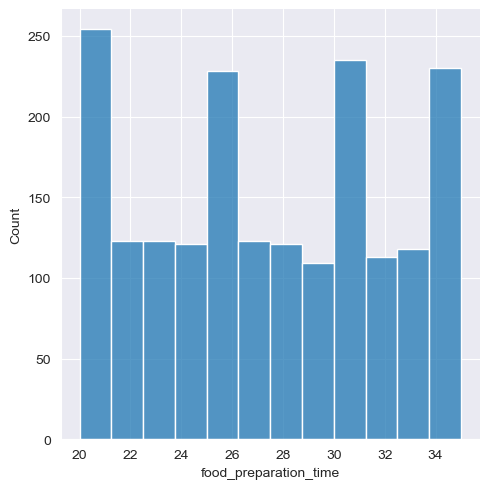

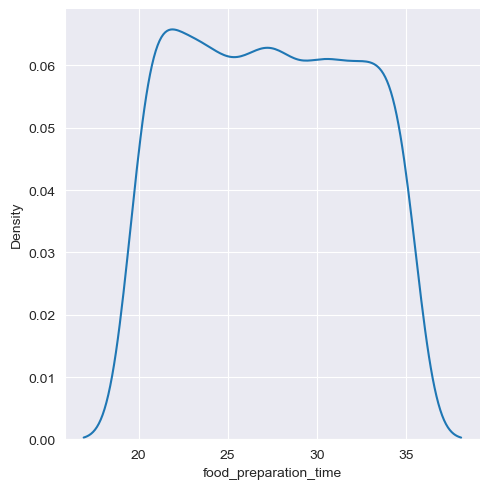

In [45]:
sns.displot(data=df, x=df.columns[7],kind="hist");
sns.displot(data=df, x=df.columns[7],kind="kde");

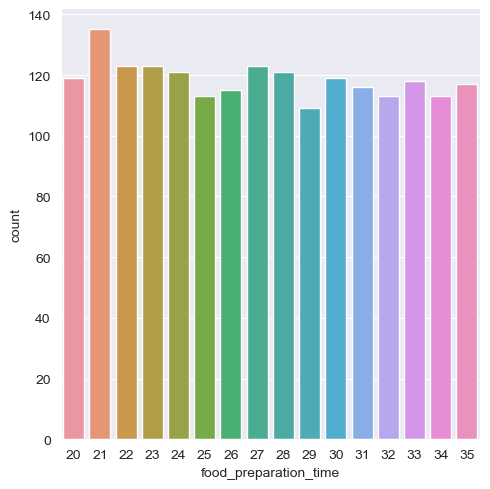

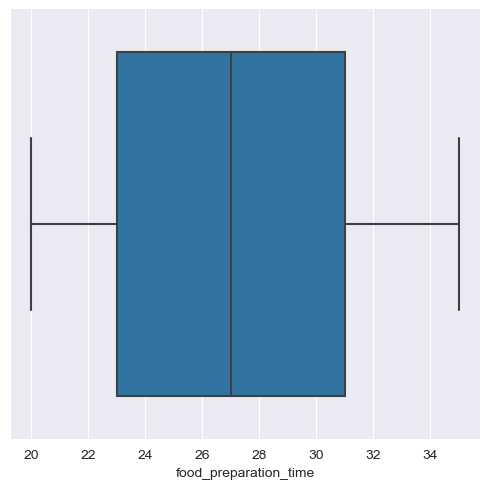

In [46]:
sns.catplot(data=df, x=df.columns[7],kind="count");
sns.catplot(data=df, x=df.columns[7], kind="box");

#### **delivery_time**
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package.<br>
This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information<br>
the most common delivery time is 24min, this is also the average


In [47]:
df.delivery_time.describe(include='all') # Statistical data for column of interest only

count   1898.00
mean      24.16
std        4.97
min       15.00
25%       20.00
50%       25.00
75%       28.00
max       33.00
Name: delivery_time, dtype: float64

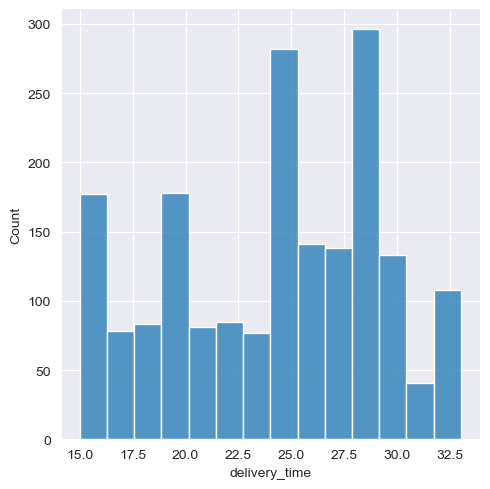

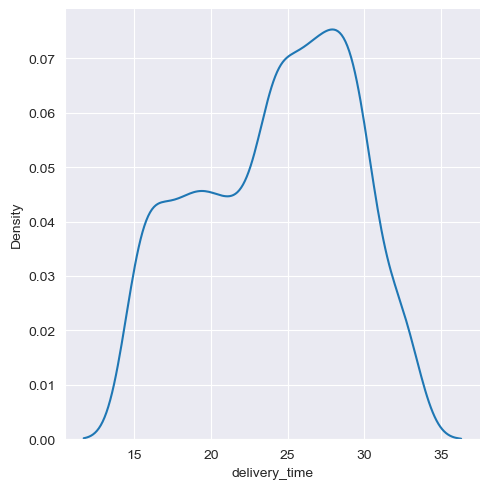

In [48]:
sns.displot(data=df, x=df.columns[8],kind="hist");
sns.displot(data=df, x=df.columns[8],kind="kde");

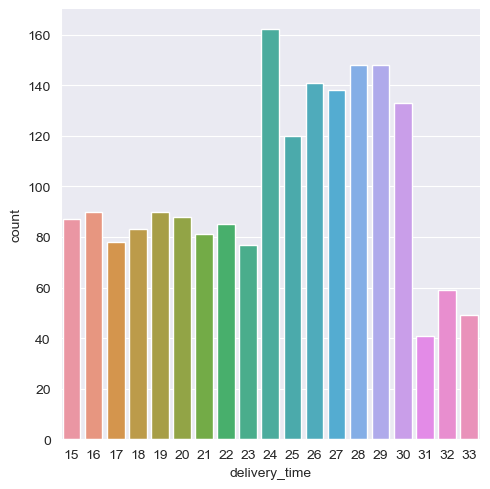

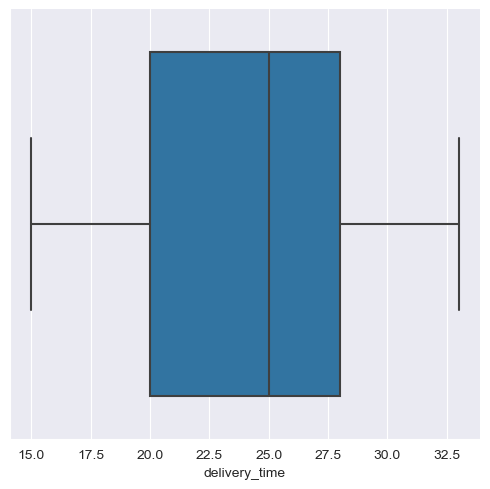

In [49]:
sns.catplot(data=df, x=df.columns[8],kind="count");
sns.catplot(data=df, x=df.columns[8], kind="box");

In [52]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [53]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [554]:
#MLS
df['restaurant_name'].value_counts()[0:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### **Answer 7:**
The most polular reataurants per number of orders are:<br>
* Shake Shack (219)<br>
* The Meatball Shop (132)<br>
* Blue Ribbon Sushi (119)<br>
* Blue Ribbon Fried Chicken (96)<br>
* Parm (68)<br>


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [54]:
df['cuisine_type'].loc[df['day_of_the_week']=='Weekend'].value_counts().sort_values(ascending=False)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

In [556]:
#Floyd Hebert
df.loc[df['day_of_the_week']=='Weekend', 'cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

In [555]:
#Marhuri Vadditandra
df.groupby(['cuisine_type'])['day_of_the_week'].value_counts()

cuisine_type    day_of_the_week
American        Weekend            415
                Weekday            169
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            207
                Weekday             91
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend         

### **Answer 8:**
The most polular cuisine type per number of orders is the **American**.<br>


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [55]:
round(sum(df['cost_of_the_order']>20)/df.shape[0]*100,2)

29.24

### **Answer 9:**
**29.24%** of the orders cost more than 20 dollars.<br>


### **Question 10**: What is the mean order delivery time? [1 mark]

In [56]:
df.delivery_time.mean()

24.161749209694417

### **Answer 10:**
the mean order delivery time is **24.16min**.<br>


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [57]:
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### **Answer 11:**
The top 3 most frequent customers are those with customer IDs: **52832, 47440 and 83287**<br>
The number or orders they placed is accordingly: **13, 10 and 9**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [94]:
#creating a new column with the total order time
df['Total_time']=df['food_preparation_time']+df['delivery_time']
df['Total_time'].describe(include='all') # Statistical data for column of interest only

count   1898.00
mean      51.53
std        6.83
min       35.00
25%       47.00
50%       52.00
75%       56.00
max       68.00
Name: Total_time, dtype: float64

In [107]:
#creating a new column for rating, replacing the "Not given" by "0"
df['rating_num']=df['rating']
df['rating_num'][df['rating_num']=="Not given"]=0
df['rating_num']=df['rating_num'].astype(int) #seting it as numeric for further analysis
sum(df['rating_num']==0) #checking the new column has the same number of 0's as the number of "Not given" in the original column

736

In [108]:
df['rating_num'].describe(include='all') # Statistical data for column of interest only

count   1898.00
mean       2.66
std        2.20
min        0.00
25%        0.00
50%        4.00
75%        5.00
max        5.00
Name: rating_num, dtype: float64

In [79]:
#checking correlation on numericals
df_numerical=['order_id', 'customer_id', 'cost_of_the_order','food_preparation_time', 'delivery_time','rating_num']
df[df_numerical].corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,rating_num
order_id,1.00,-0.01,0.02,-0.01,0.01,0.05
customer_id,-0.01,1.00,-0.00,-0.03,-0.01,0.01
cost_of_the_order,0.02,-0.00,1.00,0.04,-0.03,0.05
food_preparation_time,-0.01,-0.03,0.04,1.00,0.01,0.00
delivery_time,0.01,-0.01,-0.03,0.01,1.00,-0.00
rating_num,0.05,0.01,0.05,0.00,-0.00,1.00


In [80]:
# There is a lot (39%) of orders without rating. 
# Also there are a lot (41%) customers who made a single order
# I wantto check if the "Not given" rating related to the "single order's" customers
# If there is, could be designed price strategy (conditioned to get ratings) to incentivize more orders from those customers 
sum((df['rating_num']==0)&(df['customer_id'].value_counts()==1))
# there is no relation between those facts

0

In [85]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total_time,rating_num
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,4


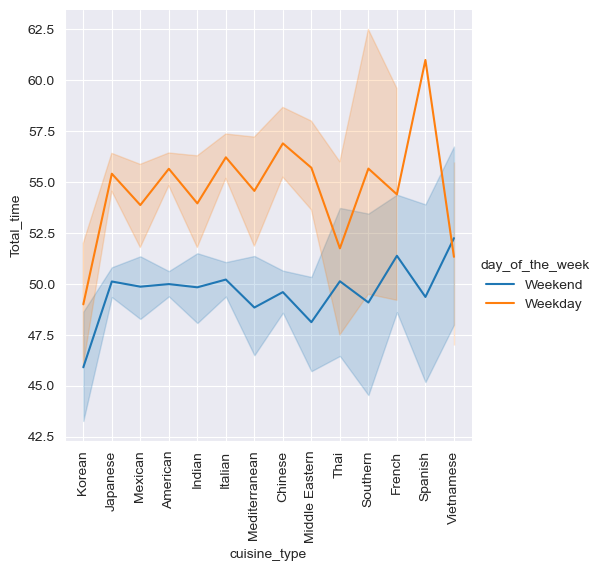

In [408]:
sns.relplot(data=df, x='cuisine_type', y='Total_time', kind="line",hue='day_of_the_week');
plt.xticks(rotation=90);

In [474]:
top10rest=df.groupby('restaurant_name')[['cost_of_the_order']].sum().sort_values('cost_of_the_order', ascending=False).reset_index().head(10)
top10rest

,restaurant_name,cost_of_the_order
0,Shake Shack,3579.53
1,The Meatball Shop,2145.21
2,Blue Ribbon Sushi,1903.95
3,Blue Ribbon Fried Chicken,1662.29
4,Parm,1112.76
5,RedFarm Broadway,965.13
6,RedFarm Hudson,921.21
7,TAO,834.50
8,Han Dynasty,755.29
9,Blue Ribbon Sushi Bar & Grill,666.62


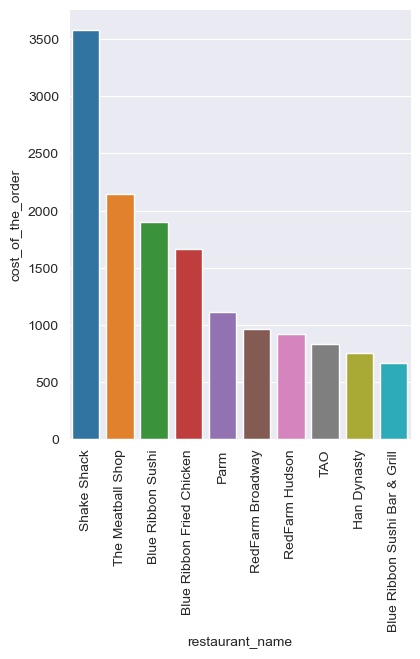

In [491]:
sns.catplot(data=top10rest,x='restaurant_name',y='cost_of_the_order',kind="bar")
plt.xticks(rotation=90);

In [482]:
top_orders=df[df['restaurant_name'].isin(top10rest['restaurant_name'])]['restaurant_name'].value_counts().tolist()

In [484]:
top10rest['Total orders']=top_orders
top10rest

,restaurant_name,cost_of_the_order,Total orders
0,Shake Shack,3579.53,219
1,The Meatball Shop,2145.21,132
2,Blue Ribbon Sushi,1903.95,119
3,Blue Ribbon Fried Chicken,1662.29,96
4,Parm,1112.76,68
5,RedFarm Broadway,965.13,59
6,RedFarm Hudson,921.21,55
7,TAO,834.50,49
8,Han Dynasty,755.29,46
9,Blue Ribbon Sushi Bar & Grill,666.62,44


In [493]:
top10rest['Cost per order']=top10rest['cost_of_the_order']/top10rest['Total orders']
top10rest

,restaurant_name,cost_of_the_order,Total orders,Cost per order
0,Shake Shack,3579.53,219,16.34
1,The Meatball Shop,2145.21,132,16.25
2,Blue Ribbon Sushi,1903.95,119,16.00
3,Blue Ribbon Fried Chicken,1662.29,96,17.32
4,Parm,1112.76,68,16.36
5,RedFarm Broadway,965.13,59,16.36
6,RedFarm Hudson,921.21,55,16.75
7,TAO,834.50,49,17.03
8,Han Dynasty,755.29,46,16.42
9,Blue Ribbon Sushi Bar & Grill,666.62,44,15.15


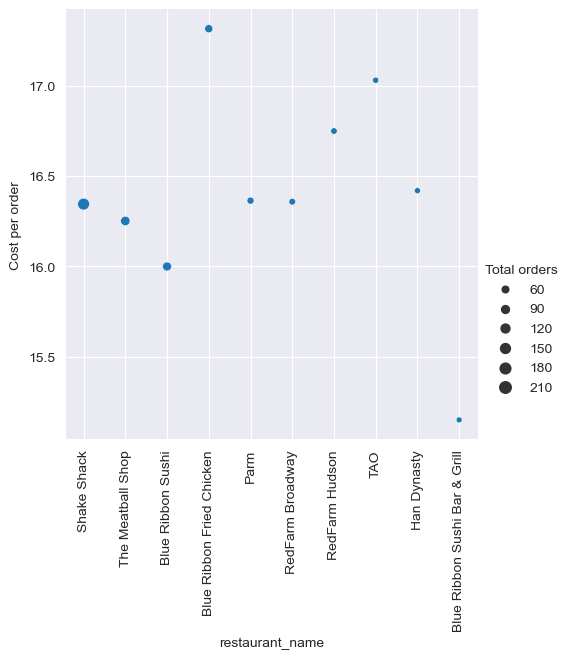

In [496]:
sns.relplot(data=top10rest,x='restaurant_name',y='Cost per order',kind="scatter",size='Total orders')
plt.xticks(rotation=90);

In [557]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'Total_time', 'rating_num'],
      dtype='object')

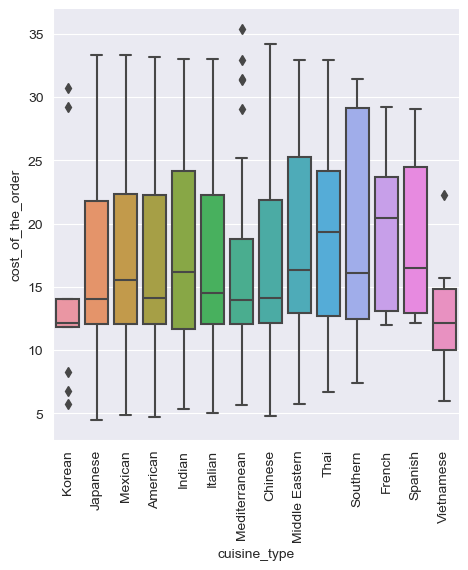

In [559]:
#MLS:
#cuisine vs cost (boxplot)
sns.catplot(df, x='cuisine_type',y='cost_of_the_order',kind="box");
plt.xticks(rotation=90);

In [ ]:
#MLS
#cousine vs (boxplot)
#Revenue by restaurant (pointplot)
#rating vs food preparation time (pointplot)
#rating vs cost of the order (pointplot)



### **Answer 12:**
**Observations:**<br>
There is no important (>50%) correlation betwwen the numerical variables <br>
The total delivery time gets improved during weekends <br>
There is a lot (39%) of orders without rating.
Also there are a lot (41%) customers who made a single order. This is no related with previous fact.
Top 10 restaurants per total sales share a very similar cost per order



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [175]:
#restaurants that have a rating count of more than 50
df['restaurant_name'][df['rating_num']>0].value_counts()[df['restaurant_name'][df['rating_num']>0].value_counts()>50]

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: count, dtype: int64

In [420]:
#list of restaurants that have a rating count of more than 50
top_rest=df['restaurant_name'][df['rating_num']>0].value_counts()[df['restaurant_name'][df['rating_num']>0].value_counts()>50].index.tolist()
top_rest_orders=df['restaurant_name'][df['rating_num']>0].value_counts()[df['restaurant_name'][df['rating_num']>0].value_counts()>50].tolist()

In [348]:
#restaurants with reviews
#df['restaurant_name'][df['rating_num']>0].value_counts()

In [350]:
#filter of restaurants with more than 50 reviews
#[df['restaurant_name'][df['rating_num']>0].value_counts()>50]

In [446]:
#restaurants with ratings and with rating average >4
#df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()[df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()>4]

In [465]:
# lists 
top_rank=df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()[df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()>4].index.tolist()
top_rank_values=df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()[df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()>4].tolist()
top_rest_rank=df[(df['restaurant_name'].isin(top_rest))&(df['rating_num']>0)].groupby(['restaurant_name'])['rating_num'].mean().tolist()

In [466]:
xx={'restaurant_name':top_rest,'total orders':top_rest_orders,'Avg rank':top_rest_rank}
promotion=pd.DataFrame(xx)
promotion

,restaurant_name,total orders,Avg rank
0,Shake Shack,133,4.33
1,The Meatball Shop,84,4.22
2,Blue Ribbon Sushi,73,4.28
3,Blue Ribbon Fried Chicken,64,4.51


In [447]:
#restaurants ratings
#df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()

In [444]:
#filter restaurants ratings > 4
#[df[df['rating_num']>0].groupby(['restaurant_name'])['rating_num'].mean()>4]

In [370]:
common_elements = list(set(top_rank).intersection(top_rest))
print(common_elements)

['Shake Shack', 'Blue Ribbon Sushi', 'The Meatball Shop', 'Blue Ribbon Fried Chicken']


In [566]:
#MLS
df_rated=df[df['rating_num']>0].copy()
df_rating_count=df_rated.groupby(['restaurant_name'])['rating_num'].count()
df_rating_count

restaurant_name
'wichcraft           1
12 Chairs            2
5 Napkin Burger      2
67 Burger            1
Amma                 2
                    ..
Zero Otto Nove       1
brgr                 1
da Umberto           1
ilili Restaurant    13
indikitch            2
Name: rating_num, Length: 156, dtype: int64

### **Answer 13:**
There are four restaurants meeting both promotion criteria, having over 50 reviews with average over 4:<br>
**Shake Shack, Blue Ribbon Sushi, The Meatball Shop and Blue Ribbon Fried Chicken**<br>

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [589]:
max_charge=df['cost_of_the_order'][df['cost_of_the_order']>20].sum()
max_charge

14754.91

In [590]:
min_charge=df['cost_of_the_order'][(df['cost_of_the_order']>5)&(df['cost_of_the_order']<=20)].sum()
min_charge

16517.170000000002

In [591]:
no_charge=df['cost_of_the_order'][df['cost_of_the_order']<=5].sum()
no_charge

42.74

In [592]:
max_charge+min_charge+no_charge

31314.820000000003

In [593]:
df['cost_of_the_order'].sum()

31314.82

In [594]:
round(max_charge*1.25+min_charge*1.15,2)#ERROR, should be just the 25% and 15%

37438.38

In [595]:
max_charge*0.25+min_charge*0.15

6166.303

In [575]:
#MLS
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x>5:
        return x*0.15
    else:
        return x*0

df['Revenue']=df['cost_of_the_order'].apply(compute_rev)
df['Revenue'].sum()

6166.303

### **Answer 14:**
The net revenue generated by the company across all orders is **44.898,5**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [390]:
df['Total_time'][df['Total_time']>60].shape[0]/df.shape[0]

0.1053740779768177

### **Answer 15:**
**10.53%** of orders take more than 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [394]:
weekday_dt=df['delivery_time'].loc[df['day_of_the_week']=='Weekday'].mean()
weekday_dt

28.340036563071298

In [395]:
weekend_dt=df['delivery_time'].loc[df['day_of_the_week']=='Weekend'].mean()
weekend_dt

22.4700222057735

In [402]:
1-weekend_dt/weekday_dt

0.20712797403186012

### **Answer 16:**
The mean delivery time during weekdays is **28.34min** while during the weekends is **20.7% faster** with a mean of **22.47min**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There is an important number of customers who have performed only one order
*  There is a long tail of restaurants with low number of orders
*  American is the predominant cuisine type, although the total order time is quite similar among all cuisine types
*  38% of orrders have no rating given, and the rest is between 3 and 5. No orders rated with 1 nor 2. The rating system might not be clear or not generating interest.

### Recommendations:

*  Design of promotions oriented to achieve 2nd orders onwards
*  Update restaurant list, focusing on top sales restaurants, to speed up delivery time
*  Korean cuisine type has a delivery time under the average. Promotion on this type of cuisine to increase sales and reduce average delivery time
*  Promotions for loyal customers, conditioned to rate orders, to promote ratings for further service improvement

---